Question 1: Understanding Overfitting with Polynomial Regression<br>
Task: Compare linear vs polynomial regression to observe overfitting.

Linear Regression - MAE: 0.4334, MSE: 0.2530, R²: 0.4472
Polynomial Regression - MAE: 0.0676, MSE: 0.0084, R²: 0.9818


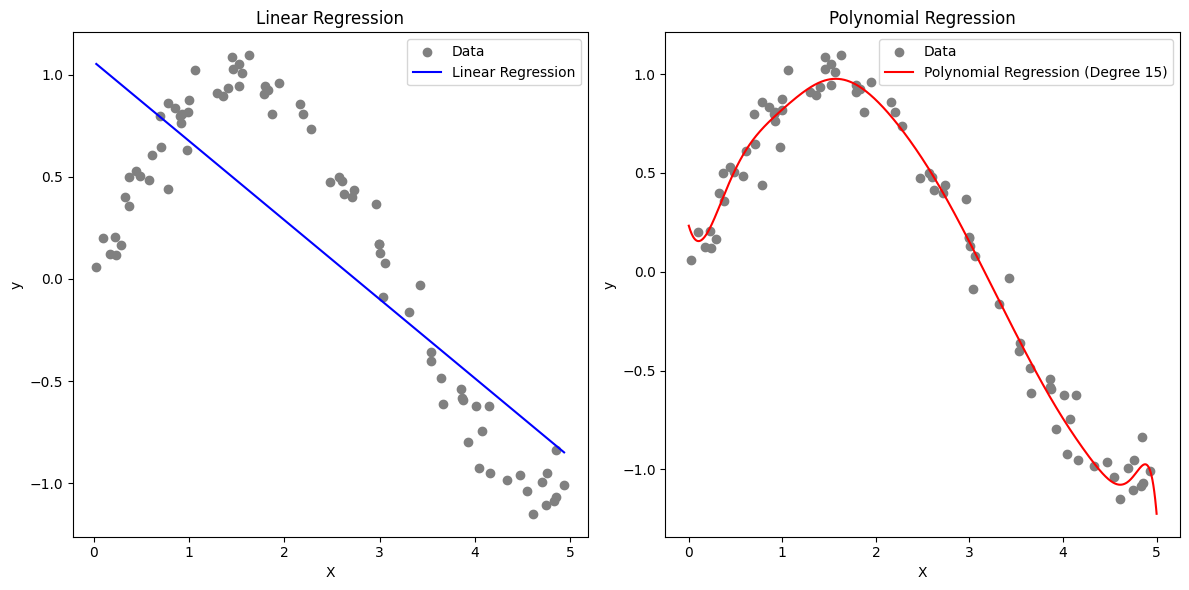

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def generate_data(seed=42):
    np.random.seed(seed)
    X = np.sort(5 * np.random.rand(80, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])
    return X, y

def split_data(X, y, test_size=0.2, seed=42):
    return train_test_split(X, y, test_size=test_size, random_state=seed)

def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_polynomial_model(X_train, y_train, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    return model, poly_features

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'Predictions': y_pred
    }

def plot_models(X, y, linear_model, poly_model, poly_features):
    X_plot = np.linspace(0, 5, 1000).reshape(-1, 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X, linear_model.predict(X), color='blue', label='Linear Regression')
    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X_plot, poly_model.predict(poly_features.transform(X_plot)), color='red', label='Polynomial Regression (Degree 15)')
    plt.title('Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main execution
X, y = generate_data()
X_train, X_test, y_train, y_test = split_data(X, y)

linear_model = train_linear_model(X_train, y_train)
poly_model, poly_features = train_polynomial_model(X_train, y_train, degree=15)

linear_metrics = evaluate_model(linear_model, X_test, y_test)
poly_metrics = evaluate_model(poly_model, poly_features.transform(X_test), y_test)

print(f"Linear Regression - MAE: {linear_metrics['MAE']:.4f}, MSE: {linear_metrics['MSE']:.4f}, R²: {linear_metrics['R2']:.4f}")
print(f"Polynomial Regression - MAE: {poly_metrics['MAE']:.4f}, MSE: {poly_metrics['MSE']:.4f}, R²: {poly_metrics['R2']:.4f}")

plot_models(X, y, linear_model, poly_model, poly_features)

